## Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

## Откуда брать данные?

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, kaggle.com). Если идей нет, можете взять один из перечисленных ниже:

    Данные IMDB;
    Данные NYC;
    Данные NBA.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')
df = df.replace(r"^\.", np.nan, regex=True)
# df.tail()

In [16]:
df['Deaths'] = df.Deaths.astype('float64')
df['Death Rate'] = df['Death Rate'].astype('float64')
df['Age Adjusted Death Rate'] = df['Age Adjusted Death Rate'].astype('float64')
# df.info()

In [4]:
deaths_by_year = df.groupby('Year').Deaths.sum()
# deaths_by_year.head()

Text(0.5, 1.0, 'Deaths by Year')

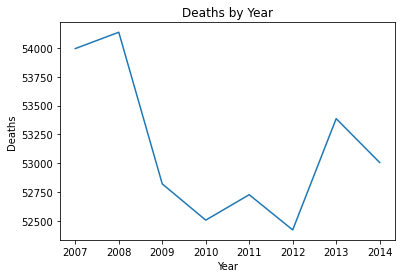

In [5]:
deaths_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title('Deaths by Year')

Переменные: 
- x год точки данных
- y общее количество смертей в NYC за период

Цель: визуализировать общую динамику количества смертей по годам. 

Гипотезы: 
- выраженной теденции нет, провести однозначную линию тренда невозможно
- пик смертности 2008 года связан с финансовым кризисом?

In [6]:
causes_of_death = (df.groupby('Leading Cause').sum().sort_values(by='Deaths', ascending=False).head(5)
                   .sort_values(by='Deaths', ascending=True))
# causes_of_death

Text(0.5, 1.0, 'Top 5 most deadly things in NYC')

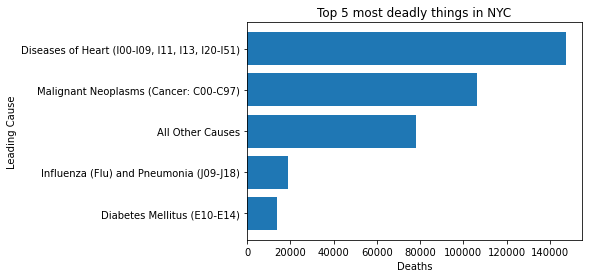

In [7]:
plt.barh(causes_of_death.index, causes_of_death['Deaths'])
plt.xlabel('Deaths')
plt.ylabel('Leading Cause')
plt.title('Top 5 most deadly things in NYC')

Переменные:
- х количество смертей
- у основная причина смерти

Цель: визуализировать ТОП-5 основных причин смерти жителей NYC и соотношение количества смертей. 

Гипотезы:
- наибольшее количество смертей от сердечных недугов, рака (топ 1, 2). Необходимо срочно прокачивать медицину?
- насильственные смерти или ЧС не входят в ТОП-5. Урезать бюджет на их финансирование?
- группа "прочих причин" на третьем месте. Плохо ведется учет? Что это за причины? Такое количество может здорово изменить результат. 

In [8]:
race_vs_cause = df.pivot_table(
                        index='Leading Cause', 
                        columns='Race Ethnicity', 
                        values='Deaths', 
                        aggfunc=sum).fillna(0).applymap(float)

# race_vs_cause

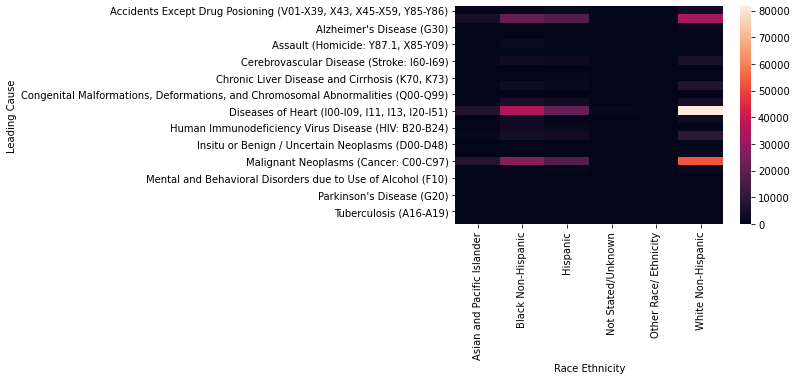

In [9]:
ax = sns.heatmap(race_vs_cause)

Переменные:
- x расовая принадлежность
- y основная причина смерти
- value количество смертей

Цель: проверить распределение количества смертей в зависимости от причины и расы умершего. 

Гипотезы:
- белые в большей степени подвержены риску смерти от болезней сердца и рака?
- среди черных не латиноамериканцев сильнее распространен ВИЧ и смертность от ВИЧ? 
- большая часть населения NYC белые? Как это влияет на статистику?

In [37]:
deaths_by_year_gender = df.groupby(['Year', 'Sex']).Deaths.sum().unstack('Sex')
# deaths_by_year_gender.head()

In [36]:
trace0 = go.Scatter(
    x=deaths_by_year_gender.index,
    y=deaths_by_year_gender.F,
    name='Female'
)

trace1 = go.Scatter(
    x=deaths_by_year_gender.index,
    y=deaths_by_year_gender.M,
    name='Male'
)
  
data = [trace0, trace1]
layout = {'title': 'Statistics of Deaths by Sex'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Переменные:
- x год замера
- y количество смертей

Цель: посмотреть соотношение мужской и женской смертности в рассматриваемом периоде.

Гипотезы:
- в общем случае графики мужской и женской смертности сонаправлены, пол не влияет на динамику смертности?
- в 2011 году произошел рост именно женской смертности, какие могут быть причины?
- мужских смертей меньше, чем женских. Выживает больший процент? Женщин просто больше? 

Переменные:

Цель:

Гипотезы: